
# Trabajo Práctico 2


Descargar el dataset **Facebook comment volume** https://archive.ics.uci.edu/ml/datasets/Facebook+Comment+Volume+Dataset. 

El dataset tiene diferentes versiones, utilizaremos la **número 5** para train y para test **Features_TestSet**. 

Notar que trae **carpeta de train y de test**. 

Una descripcióm completa del dataset pueden encontrarla en el link. Se trata de publicaciones de Facebook y se quiere **predecir la columna 54: cantidad de comentarios en las próximas H horas"**.

El dataset contiene variables en muchos formatos diferentes, algunos de los cuales no hemos trabajado o no lo hemos hechos en profundidad. Esas variables pueden ser descartadas o bien hacer una investigación personal para ver de qué manera poder incluirlas para mejorar los resultados obtenidos.



# LIMITACION DE SCOPE
Para este trabajo solo voy a usar el set de VAR1 de training.
 

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [191]:
import pandas as pd
from sklearn import * 
import numpy as np


%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'


# Cargar datos
Cargar los datos de entrenamiento.

In [192]:
# Originalmente, el set de training deberia tener 40998
X_var5 = pd.read_csv("Dataset/Training/Features_Variant_5.csv")

# Labeling de features
X_var5.columns = ['Page Popularity/likes', 'Page Checkins', 'Page talking about ', 'Page Category ', 'Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV', 'CMNTS C1','CMNTS C2','CMNTS C3','CMNTS C4','CMNTS C5','BASE TIME', 'Post length', 'Post Share Count','Post Promotion Status ',' H after BDT for target','PUBlished Weekdays (bin)','PUBlished Weekdays (bin)','PUBlished Weekdays (bin)','PUBlished Weekdays (bin)','PUBlished Weekdays (bin)','PUBlished Weekdays (bin)','PUBlished Weekdays (bin)','BDT weekday (bin)','BDT weekday (bin)','BDT weekday (bin)','BDT weekday (bin)','BDT weekday (bin)','BDT weekday (bin)','BDT weekday (bin)','TARGET VALUE IN NEXT H HOURS']


In [193]:
# set de testing completo, medio raro que tenga menos que 10120 tho. 
Y_test_set = pd.read_csv("Dataset/Testing/Features_TestSet.csv")

# Labeling de features
Y_test_set.columns = ['Page Popularity/likes', 'Page Checkins', 'Page talking about ', 'Page Category ', 'Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV','Essential DRV', 'CMNTS C1','CMNTS C2','CMNTS C3','CMNTS C4','CMNTS C5','BASE TIME', 'Post length', 'Post Share Count','Post Promotion Status ',' H after BDT for target','PUBlished Weekdays (bin)','PUBlished Weekdays (bin)','PUBlished Weekdays (bin)','PUBlished Weekdays (bin)','PUBlished Weekdays (bin)','PUBlished Weekdays (bin)','PUBlished Weekdays (bin)','BDT weekday (bin)','BDT weekday (bin)','BDT weekday (bin)','BDT weekday (bin)','BDT weekday (bin)','BDT weekday (bin)','BDT weekday (bin)','TARGET VALUE IN NEXT H HOURS']



# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario. 

### Feature engineering TRAIN

In [194]:
print(X_var5.shape)
if X_var5.isnull().values.any() == 0:
    print("No hay NANS")
else:
    print("si hay NANS")

# Veo un head del original
X_var5.shape

# Por el alto estudio que hice del data set considero que estas features no me van a servir para mi basico analisis

#35 Base time: solo me dice donde puso el cut-off para obtener las variantes
#39 H local: solo me dice el tiempo luego del cut-off en el que medi el target.
#40-46 Valor binario Weekday
#47-53 Valor binario cut-off realted weekday
#4 Categoria de la pagina de donde salio el post. 
X_var5= X_var5.drop(columns=['PUBlished Weekdays (bin)','BDT weekday (bin)',' H after BDT for target','BASE TIME','Page Category '])
X_var5.shape

(199029, 54)
No hay NANS


(199029, 37)

In [195]:
X_var5.head()

,Page Popularity/likes,Page Checkins,Page talking about,Essential DRV,Essential DRV,Essential DRV,Essential DRV,Essential DRV,Essential DRV,Essential DRV,...,Essential DRV,CMNTS C1,CMNTS C2,CMNTS C3,CMNTS C4,CMNTS C5,Post length,Post Share Count,Post Promotion Status,TARGET VALUE IN NEXT H HOURS
0,634995,0,463,0.0,1280.0,13.158779,1.0,94.99364,0.0,806.0,...,41.77087,0,0,0,0,0,132,1,0,0
1,634995,0,463,0.0,1280.0,13.158779,1.0,94.99364,0.0,806.0,...,41.77087,0,0,0,0,0,133,2,0,0
2,634995,0,463,0.0,1280.0,13.158779,1.0,94.99364,0.0,806.0,...,41.77087,7,0,0,7,0,131,1,0,0
3,634995,0,463,0.0,1280.0,13.158779,1.0,94.99364,0.0,806.0,...,41.77087,1,0,0,1,0,142,5,0,0
4,634995,0,463,0.0,1280.0,13.158779,1.0,94.99364,0.0,806.0,...,41.77087,0,0,0,0,0,166,1,0,0


In [196]:
X_var5_target = X_var5[['TARGET VALUE IN NEXT H HOURS']].copy()
X_var5_target.shape
X_var5_target.head(5)

,TARGET VALUE IN NEXT H HOURS
0,0
1,0
2,0
3,0
4,0


In [197]:
X_var5= X_var5.drop(columns=['TARGET VALUE IN NEXT H HOURS'])
X_var5.shape

(199029, 36)

In [198]:
# en primera instancia estandarizo
scaler_train = preprocessing.StandardScaler().fit(X_var5)
X_var5_std= scaler_train.transform(X_var5)  
X_var5_std.shape  #me lo paso a un Numpy array


(199029, 36)

### Exploracion datos Testing - Forma y consitencia

In [199]:
print(Y_test_set.shape)

if Y_test_set.isnull().values.any() == 0:
    print("No hay NANS")
else:
    print("si hay NANS")

# Veo un head
Y_test_set.head(2)

Y_test_set= Y_test_set.drop(columns=['PUBlished Weekdays (bin)','BDT weekday (bin)',' H after BDT for target','BASE TIME','Page Category '])
Y_test_set.shape


Y_test_set_target = Y_test_set[['TARGET VALUE IN NEXT H HOURS']].copy()
Y_test_set_target.shape
Y_test_set_target.head(5)

Y_test_set= Y_test_set.drop(columns=['TARGET VALUE IN NEXT H HOURS'])
Y_test_set.shape


(10043, 54)
No hay NANS


(10043, 36)

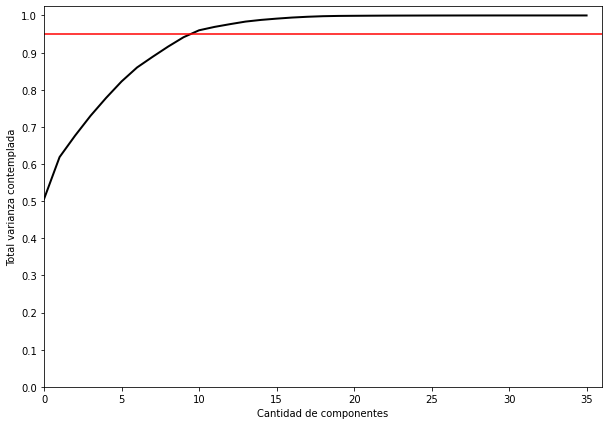

(199029, 11)

In [200]:
# Elimino componentes de poca varianza en set de train .

pca = PCA(n_components=0.95, random_state=8).fit(X_var5_std)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_2.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 36)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(63, c='b')
plt.axhline(0.95, c='r')
plt.show();

X_var5_pca = pca.transform(X_var5_std)
X_var5_pca.shape



In [201]:
# Me quede con 11 componentes no mas que explican el 95 porciento de la variance
#Sobre esas voy a entrenar el modelo.

# hacer pearsons para sacar variables de train correlacionadas! 

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [206]:
lr = linear_model.LinearRegression(fit_intercept=False) #caso general, que no obligue a pasar por la ordenada
lr.fit(X_var5_pca,X_var5_target)
print(lr.coef_)  #me da 11 ordenadas
print(lr.intercept_)

[[ 2.94448165  1.94794336  2.27448292 -6.48749938 -6.63750074  3.68959136
   2.50053551  0.16145149  0.41901543 -0.26376865  0.38014591]]
0.0


# APPENDIX 1 - Attribute Information

1
Page Popularity/likes
Decimal Encoding
Page feature
Defines the popularity or support for the source of the document.


2
Page Checkinsâ€™s
Decimal Encoding
Page feature
Describes how many individuals so far visited this place. This feature is only associated with the places eg:some institution, place, theater etc.


3
Page talking about
Decimal Encoding
Page feature
Defines the daily interest of individuals towards source of the document/ Post. The people who actually come back to the page, after liking the page. This include activities such as comments, likes to a post, shares, etc by visitors to the page.


4
Page Category
Value Encoding
Page feature
Defines the category of the source of the document eg: place, institution, brand etc.


5 - 29
Derived
Decimal Encoding
Derived feature
These features are aggregated by page, by calculating min, max, average, median and standard deviation of essential features.


30
CC1
Decimal Encoding
Essential feature
The total number of comments before selected base date/time.


31
CC2
Decimal Encoding
Essential feature
The number of comments in last 24 hours, relative to base date/time.


32
CC3
Decimal Encoding
Essential feature
The number of comments in last 48 to last 24 hours relative to base date/time.


33
CC4
Decimal Encoding
Essential feature
The number of comments in the first 24 hours after the publication of post but before base date/time.


34
CC5
Decimal Encoding
Essential feature
The difference between CC2 and CC3.


35
Base time
Decimal(0-71) Encoding
Other feature
Selected time in order to simulate the scenario.


36
Post length
Decimal Encoding
Other feature
Character count in the post.


37
Post Share Count
ï¿¼ï¿¼Decimal Encoding
Other feature
This features counts the no of shares of the post, that how many peoples had shared this post on to their timeline.


38
Post Promotion Status
ï¿¼ï¿¼Binary Encoding
Other feature
To reach more people with posts in News Feed, individual promote their post and this features tells that whether the post is promoted(1) or not(0).


39
H Local
ï¿¼Decimal(0-23) Encoding
Other feature
This describes the H hrs, for which we have the target variable/ comments received.


40-46
Post published weekday
Binary Encoding
Weekdays feature
This represents the day(Sunday...Saturday) on which the post was published.


47-53
Base DateTime weekday
Binary Encoding
Weekdays feature
This represents the day(Sunday...Saturday) on selected base Date/Time.

54
Target Variable
Decimal
Target
The no of comments in next H hrs(H is given in Feature no 39).

# APPENDIX 2 - Notas sobre el dataset

The task here is to estimate the comment count that a post is expected to receive in next few hours.
La unidad basica es el post. 

Target value: Comentarios que recibe el post. 
NOTE: Given some posts that appeared in past, whose target values (comments received) are already known, we simulated the scenario.

Los autores lo consideran un problema de regresion (porque se estima un valor numerico que es el comment count)


### Respecto al tiempo. 

Base date/time. El autor establece una hora y una fecha como BD/T arbitrariamente. tanto para separar en test y train, como para hacer el split del dataset original. It is selected to simulate the scenario, as we already know what will happen after this. There is one more kind of time we used in this formulation: is the post published time, which comes before the selected base date/time.

Luego el split de train y testing se hace en base al tiempo. Se selecciona arbitrariamente una fecha/hora y lo que esta antes es de train (el pasado), y lo que esta despues es de test(el futuro)

Total posts: 51108. De los que quedan 80% en train (40998). y 20% en test (10120).



### Features
53 en total + el target value para cada **post** 

- 4 features meta de la pagina en donde esta el post. Page likes, Page Category, Page Checkin's, Page Talking About.

- 5 esenciales primarias que representan cantidad de comentarios para distintos tiempos en relacion al base date/time.  La cantidad de comentarios se hace *para atras*, es decir una vez que defino el base date time, cuento para atras cuantos comentarios hubo. en distintos intervalos

C1. Cantidad total de comentarios antes del basedatetime seleccionado. Se define 72hs no se porque. 
C2. cantidad de comentarios 24 hs antes del selected BDT.

# APPENDIX 3 - Backround estrucutra del data set. 

Para cada POST se definieron 53 features y 1 target value. Las features estan en columnas en los datasets originales. 

Luego para cada post del dataset original, le hace *"variantes"*.

Var1: le saca una foto.

Var2: le saca dos fotos en tiempos disitntos

Var3: le saca 3 fotos en tiempos disitntos. 

Var4: le saca 4 fotos en tiempos disitntos. 

Var5: le saca 5 fotos en tiempos disitntos. 

Entonces asi multiplica el post original. como si fueran varios posts individuales, con disitntas metricas y target values. 

En este esquema, hay algunas variables que son medio bajon para tener en cuenta en el entrenamiento del modelo. 
- La variable target es la que se quiere predecir. Asi que el modelo de regresion no se puede entrenar con ella. 
- La variable de BDT, H, estan relacionadas con la Target. progbablemente sea mejor usarlas para obtener otras variables. para analisis de datos mas finos. 
OJO con esto! si supiese mas analisis de datos haria mas cosas con esto.  
